![image](competi.png)

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='NaN', strategy = 'mean')

In [39]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [40]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


**Importante:**

   - Si quitas columnas o creas columnas nuevas a partir de otras, o cualquier modificación column-wise tendrás que aplicarlo al dataset de `titanic_test.csv` de cara a hacer la predicción.
   - Si por lo contrario, decides por ejemplo, quitar los outliers o hacer un `dropna()`, o cualquier modificación row-wise eso NO PODRÁS (ni debes) aplicarlo al dataset de `titanic_test.csv` de cara a hacer la predicción. ¿Por qué? Porque si el conjunto de test tiene 50 observaciones (filas) la predicción se espera que tenga 50 filas.

#### ¿Y si lo que hago es estandarizar los datos o hacer un encoding, también se lo tengo que hacer al test antes de predecir?

In [5]:
# ¿qué opináis? 

-----------------------------------------------------------------------------------------------------------------

### Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [55]:
# coger las columnas "x", "y", "z" tiene solo valor ilustrativo, NO LO COPIÉIS
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X.shape

(40345, 16)

In [5]:
y.shape

(40345,)

In [ ]:
G, E, F, H, D, I, J


In [54]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['color']]).toarray())
df = df.join(enc_df)


,carat,cut,color,clarity,depth,table,x,y,z,price,0,1,2,3,4,5,6
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [57]:
df.rename(columns={4: "colorH", 0: "colorD", 1: "colorE", 3: "colorG", 2: "colorF", 5: "colorI", 6: "colorJ"}, inplace=True)
df.drop(columns=['color'], inplace=True)
df

,carat,cut,clarity,depth,table,x,y,z,price,colorD,colorE,colorF,colorG,colorH,colorI,colorJ
0,1.21,Ideal,VS2,63.0,57.0,6.73,6.70,4.23,6134,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,Very Good,VVS2,64.0,56.0,4.14,4.17,2.66,532,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.42,Premium,VS1,61.2,58.0,4.86,4.82,2.96,1103,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.26,Ideal,IF,61.1,57.0,4.16,4.12,2.53,600,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.10,Good,SI1,63.4,57.0,6.52,6.55,4.14,4997,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,VS2,61.3,61.0,7.46,7.39,4.55,11708,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40341,0.36,Ideal,SI1,60.6,56.0,4.58,4.63,2.79,619,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40342,0.57,Very Good,VS2,62.2,55.0,5.33,5.34,3.32,1267,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40343,1.01,Very Good,IF,59.6,62.0,6.47,6.56,3.88,9965,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
enc_df = pd.DataFrame(enc.fit_transform(df[['clarity']]).toarray())
df = df.join(enc_df)
df

,carat,cut,clarity,depth,table,x,y,z,price,colorD,...,colorI,colorJ,0,1,2,3,4,5,6,7
0,1.21,Ideal,VS2,63.0,57.0,6.73,6.70,4.23,6134,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,Very Good,VVS2,64.0,56.0,4.14,4.17,2.66,532,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.42,Premium,VS1,61.2,58.0,4.86,4.82,2.96,1103,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.26,Ideal,IF,61.1,57.0,4.16,4.12,2.53,600,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.10,Good,SI1,63.4,57.0,6.52,6.55,4.14,4997,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,VS2,61.3,61.0,7.46,7.39,4.55,11708,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40341,0.36,Ideal,SI1,60.6,56.0,4.58,4.63,2.79,619,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40342,0.57,Very Good,VS2,62.2,55.0,5.33,5.34,3.32,1267,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40343,1.01,Very Good,IF,59.6,62.0,6.47,6.56,3.88,9965,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df.rename(columns={0: "clarityI1", 1: "clarityIF", 2: "claritySI1", 3: "claritySI2", 4: "clarityVS1", 5: "clarityVS2", 6: "clarityVVS1", 7: "clarityVVS2"}, inplace=True)
df.drop(columns=['clarity'], inplace=True)
df

,carat,cut,depth,table,x,y,z,price,colorD,colorE,...,colorI,colorJ,clarityI1,clarityIF,claritySI1,claritySI2,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2
0,1.21,Ideal,63.0,57.0,6.73,6.70,4.23,6134,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,Very Good,64.0,56.0,4.14,4.17,2.66,532,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.42,Premium,61.2,58.0,4.86,4.82,2.96,1103,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.26,Ideal,61.1,57.0,4.16,4.12,2.53,600,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.10,Good,63.4,57.0,6.52,6.55,4.14,4997,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,61.3,61.0,7.46,7.39,4.55,11708,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40341,0.36,Ideal,60.6,56.0,4.58,4.63,2.79,619,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40342,0.57,Very Good,62.2,55.0,5.33,5.34,3.32,1267,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40343,1.01,Very Good,59.6,62.0,6.47,6.56,3.88,9965,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
enc_df = pd.DataFrame(enc.fit_transform(df[['cut']]).toarray())
df = df.join(enc_df)
df

,carat,cut,depth,table,x,y,z,price,colorD,colorE,...,claritySI2,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2,0,1,2,3,4
0,1.21,Ideal,63.0,57.0,6.73,6.70,4.23,6134,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,Very Good,64.0,56.0,4.14,4.17,2.66,532,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.42,Premium,61.2,58.0,4.86,4.82,2.96,1103,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.26,Ideal,61.1,57.0,4.16,4.12,2.53,600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.10,Good,63.4,57.0,6.52,6.55,4.14,4997,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,61.3,61.0,7.46,7.39,4.55,11708,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40341,0.36,Ideal,60.6,56.0,4.58,4.63,2.79,619,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40342,0.57,Very Good,62.2,55.0,5.33,5.34,3.32,1267,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40343,1.01,Very Good,59.6,62.0,6.47,6.56,3.88,9965,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
df.rename(columns={0: "cutFair", 1: "cutGood", 2: "cutIdeal", 3: "cutPremium", 4: "cutVeryGood"}, inplace=True)
df.drop(columns=['cut'], inplace=True)
df

,carat,depth,table,x,y,z,price,colorD,colorE,colorF,...,claritySI2,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2,cutFair,cutGood,cutIdeal,cutPremium,cutVeryGood
0,1.21,63.0,57.0,6.73,6.70,4.23,6134,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,64.0,56.0,4.14,4.17,2.66,532,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.42,61.2,58.0,4.86,4.82,2.96,1103,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.26,61.1,57.0,4.16,4.12,2.53,600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.10,63.4,57.0,6.52,6.55,4.14,4997,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,61.3,61.0,7.46,7.39,4.55,11708,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40341,0.36,60.6,56.0,4.58,4.63,2.79,619,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40342,0.57,62.2,55.0,5.33,5.34,3.32,1267,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40343,1.01,59.6,62.0,6.47,6.56,3.88,9965,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [136]:
df

,carat,depth,table,x,y,z,price,colorD,colorE,colorF,...,claritySI2,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2,cutFair,cutGood,cutIdeal,cutPremium,cutVeryGood
0,1.21,63.0,57.0,6.73,6.70,4.23,6134,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,64.0,56.0,4.14,4.17,2.66,532,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.42,61.2,58.0,4.86,4.82,2.96,1103,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.26,61.1,57.0,4.16,4.12,2.53,600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.10,63.4,57.0,6.52,6.55,4.14,4997,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,61.3,61.0,7.46,7.39,4.55,11708,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40341,0.36,60.6,56.0,4.58,4.63,2.79,619,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40342,0.57,62.2,55.0,5.33,5.34,3.32,1267,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40343,1.01,59.6,62.0,6.47,6.56,3.88,9965,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
scaled_df

,carat,depth,table,x,y,z,colorD,colorE,colorF,colorG,...,claritySI2,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2,cutFair,cutGood,cutIdeal,cutPremium,cutVeryGood
0,0.880093,0.877395,-0.205924,0.897395,0.844339,1.001745,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,1.842780,-0.268554,-0.325171,-0.174031,-0.317472,1.227786,-0.586996,-0.537222
1,-1.095267,1.579543,-0.653290,-1.417842,-1.358400,-1.261634,2.636536,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,3.075303,-0.174031,-0.317472,-0.814474,-0.586996,1.861429
2,-0.797901,-0.386471,0.241442,-0.774224,-0.792479,-0.829141,-0.379286,-0.472015,2.158352,-0.516602,...,-0.451351,2.369145,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,1.703589,-0.537222
3,-1.137748,-0.456686,-0.205924,-1.399964,-1.401932,-1.449047,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,1.227786,-0.586996,-0.537222
4,0.646448,1.158254,-0.205924,0.709673,0.713742,0.871998,-0.379286,-0.472015,-0.463316,1.935724,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,3.149883,-0.814474,-0.586996,-0.537222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.602267,-0.316256,1.583541,1.549952,1.445087,1.463071,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,1.842780,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,1.703589,-0.537222
40341,-0.925343,-0.807760,-0.653290,-1.024520,-0.957902,-1.074220,2.636536,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,1.227786,-0.586996,-0.537222
40342,-0.479294,0.315677,-1.100656,-0.354085,-0.339742,-0.310150,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,1.842780,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,-0.586996,1.861429
40343,0.455284,-1.509908,2.030907,0.664977,0.722449,0.497170,-0.379286,-0.472015,2.158352,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,-0.586996,1.861429


In [62]:
df.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'colorD', 'colorE',
       'colorF', 'colorG', 'colorH', 'colorI', 'colorJ', 'clarityI1',
       'clarityIF', 'claritySI1', 'claritySI2', 'clarityVS1', 'clarityVS2',
       'clarityVVS1', 'clarityVVS2', 'cutFair', 'cutGood', 'cutIdeal',
       'cutPremium', 'cutVeryGood'],
      dtype='object')

In [64]:
X = np.array(df[['carat', 'depth', 'table', 'x', 'y', 'z', 'colorD', 'colorE',
       'colorF', 'colorG', 'colorH', 'colorI', 'colorJ', 'clarityI1',
       'clarityIF', 'claritySI1', 'claritySI2', 'clarityVS1', 'clarityVS2',
       'clarityVVS1', 'clarityVVS2', 'cutFair', 'cutGood', 'cutIdeal',
       'cutPremium', 'cutVeryGood']])
y = np.array(df[["price"]])

In [80]:
dfn = df.drop(columns=['price'])

#### ¿Y si después del análisis exploratorio de mis datos llego a la conclusión de que puedo predecir el precio solo con las columnas `x`, `y` y `z`, también aplica al test?

In [8]:
# ¿qué opináis?

In [67]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
matplotlib.style.use('ggplot')

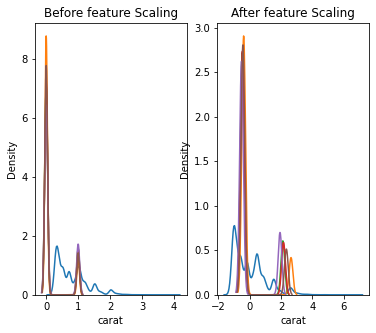

In [82]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dfn)
scaled_df = pd.DataFrame(scaled_df, columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'colorD', 'colorE',
       'colorF', 'colorG', 'colorH', 'colorI', 'colorJ', 'clarityI1',
       'clarityIF', 'claritySI1', 'claritySI2', 'clarityVS1', 'clarityVS2',
       'clarityVVS1', 'clarityVVS2', 'cutFair', 'cutGood', 'cutIdeal',
       'cutPremium', 'cutVeryGood'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before feature Scaling')
sns.kdeplot(df['carat'], ax=ax1)
sns.kdeplot(df['colorD'], ax=ax1)
sns.kdeplot(df['colorE'], ax=ax1)
sns.kdeplot(df['colorF'], ax=ax1)
sns.kdeplot(df['colorG'], ax=ax1)
sns.kdeplot(df['colorH'], ax=ax1)
ax2.set_title('After feature Scaling')
sns.kdeplot(scaled_df['carat'], ax=ax2)
sns.kdeplot(scaled_df['colorD'], ax=ax2)
sns.kdeplot(scaled_df['colorE'], ax=ax2)
sns.kdeplot(scaled_df['colorF'], ax=ax2)
sns.kdeplot(scaled_df['colorG'], ax=ax2)
sns.kdeplot(scaled_df['colorH'], ax=ax2)
plt.show()

In [83]:
scaled_df

,carat,depth,table,x,y,z,colorD,colorE,colorF,colorG,...,claritySI2,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2,cutFair,cutGood,cutIdeal,cutPremium,cutVeryGood
0,0.880093,0.877395,-0.205924,0.897395,0.844339,1.001745,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,1.842780,-0.268554,-0.325171,-0.174031,-0.317472,1.227786,-0.586996,-0.537222
1,-1.095267,1.579543,-0.653290,-1.417842,-1.358400,-1.261634,2.636536,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,3.075303,-0.174031,-0.317472,-0.814474,-0.586996,1.861429
2,-0.797901,-0.386471,0.241442,-0.774224,-0.792479,-0.829141,-0.379286,-0.472015,2.158352,-0.516602,...,-0.451351,2.369145,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,1.703589,-0.537222
3,-1.137748,-0.456686,-0.205924,-1.399964,-1.401932,-1.449047,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,1.227786,-0.586996,-0.537222
4,0.646448,1.158254,-0.205924,0.709673,0.713742,0.871998,-0.379286,-0.472015,-0.463316,1.935724,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,3.149883,-0.814474,-0.586996,-0.537222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.602267,-0.316256,1.583541,1.549952,1.445087,1.463071,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,1.842780,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,1.703589,-0.537222
40341,-0.925343,-0.807760,-0.653290,-1.024520,-0.957902,-1.074220,2.636536,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,1.227786,-0.586996,-0.537222
40342,-0.479294,0.315677,-1.100656,-0.354085,-0.339742,-0.310150,-0.379286,-0.472015,-0.463316,-0.516602,...,-0.451351,-0.422093,1.842780,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,-0.586996,1.861429
40343,0.455284,-1.509908,2.030907,0.664977,0.722449,0.497170,-0.379286,-0.472015,2.158352,-0.516602,...,-0.451351,-0.422093,-0.542658,-0.268554,-0.325171,-0.174031,-0.317472,-0.814474,-0.586996,1.861429


In [139]:
X = np.array(scaled_df[['carat', 'table', 'x', 'y', 'z','colorG', 'colorH', 'colorI', 'colorJ',
       'claritySI1', 'claritySI2', 'clarityVVS2', 'cutFair', 'cutGood',
       'cutPremium']])
y = np.array(df[["price"]])

In [140]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(15, 'price').index
columns

Index(['price', 'carat', 'x', 'z', 'y', 'claritySI2', 'table', 'cutPremium',
       'colorI', 'colorJ', 'colorH', 'cutFair', 'claritySI1', 'colorG',
       'cutVeryGood'],
      dtype='object')

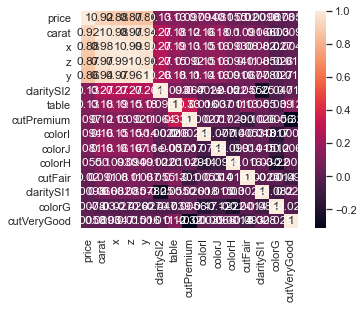

In [141]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, yticklabels=columns.values, xticklabels=columns.values)

plt.show()

### 2. Dividir X_train, X_test, y_train, y_test

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [112]:
X_train

array([[ 0.62520762,  1.43911348, -0.20592369, ..., -0.17403097,
        -0.31747208, -0.8144743 ],
       [-0.45805399,  0.03481763, -0.6532898 , ..., -0.17403097,
        -0.31747208, -0.8144743 ],
       [-1.01030501, -0.24604154,  0.24144242, ..., -0.17403097,
        -0.31747208, -0.8144743 ],
       ...,
       [ 0.0729566 , -0.10561196,  0.24144242, ..., -0.17403097,
        -0.31747208, -0.8144743 ],
       [ 0.51900551, -0.38647113, -0.20592369, ..., -0.17403097,
        -0.31747208,  1.22778583],
       [ 0.62520762,  0.66675076,  0.24144242, ..., -0.17403097,
        -0.31747208, -0.8144743 ]])

### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros. 

**Consejo**: Usa GridSearch y vuélvete loca o loco probando modelos e hiperparámetros.

In [113]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Siempre hay tiempo para una historia:
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html

### 4. Entrenar el modelo con X_train, y_train

### 5. Predecir con el modelo ya entrenado con X_test

### 6. Sacar métricas, valorar el modelo 

Recuerdo que en la competición se va a evaluar con la métrica de RMSE.

In [114]:
np.sqrt(mean_squared_error(y_test, y_pred))

1111.0519491417358

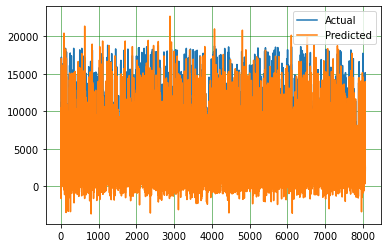

In [115]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [95]:
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 50 and the array at index 1 has size 40345

In [103]:
X.shape

(40345, 26)

In [110]:
X_opt.shape

(40345, 22)

In [108]:
X_opt = X[:,[0,1,2,3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.467
Method:                 Least Squares   F-statistic:                              1769.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        16:38:48   Log-Likelihood:                     -3.9267e+05
No. Observations:               40345   AIC:                                  7.854e+05
Df Residuals:                   40325   BIC:                                  7.856e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5474.5421     96.355     56.816      0.000    5285.683    5663.401
x2          -106.8056     24.328     -4.390      0.000    -154.489     -59.122
x3           -62.8843     26.994     -2.330      0.020    -115.794      -9.975
x4         -1321.6648     96.735    -13.663      0.000   -1511.267   -1132.063
x5         -5.104e+14   1.12e+14     -4.564      0.000    -7.3e+14   -2.91e+14
x6         -5.941e+14    1.3e+14     -4.564      0.000   -8.49e+14   -3.39e+14
x7         -5.871e+14   1.29e+14     -4.564      0.000   -8.39e+14   -3.35e+14
x8         -6.276e+14   1.38e+14     -4.564      0.000   -8.97e+14   -3.58e+14
x9         -5.563e+14   1.22e+14     -4.564      0.000   -7.95e+14   -3.17e+14
x10        -4.612e+14   1.01e+14     -4.564      0.000   -6.59e+14   -2.63e+14
x11        -3.368e+14   7.38e+13     -4.564      0.000   -4.81e+14   -1.92e+14
x12        -6.483e+15   1.42e+15     -4.564      0.000   -9.27e+15    -3.7e+15
x13        -1.007e+16   2.21e+15     -4.564      0.000   -1.44e+16   -5.75e+15
x14        -2.387e+16   5.23e+15     -4.564      0.000   -3.41e+16   -1.36e+16
x15        -2.091e+16   4.58e+15     -4.564      0.000   -2.99e+16   -1.19e+16
x16        -1.998e+16   4.38e+15     -4.564      0.000   -2.86e+16   -1.14e+16
x17        -2.338e+16   5.12e+15     -4.564      0.000   -3.34e+16   -1.33e+16
x18        -1.397e+16   3.06e+15     -4.564      0.000      -2e+16   -7.97e+15
x19         -1.64e+16   3.59e+15     -4.564      0.000   -2.34e+16   -9.36e+15
x20         -121.1485     22.306     -5.431      0.000    -164.869     -77.428
x21          -38.1326     21.687     -1.758      0.079     -80.640       4.375
x22           45.1601     25.498      1.771      0.077      -4.816      95.136
==============================================================================
Omnibus:                    11391.969   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           294535.661
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      16.143   Cond. No.                     2.30e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.01e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-----------------------------------------------------------------

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [134]:
model2 = CatBoostRegressor()


grid = {'learning_rate': [0.1],
        'depth': [6],
        'l2_leaf_reg': [1]}

grid_search_result = model2.grid_search(grid, 
                                       X_train, 
                                       y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5081.4595339	test: 5052.4765124	best: 5052.4765124 (0)	total: 6.44ms	remaining: 6.44s
1:	learn: 4625.5762778	test: 4599.0895493	best: 4599.0895493 (1)	total: 10.8ms	remaining: 5.37s
2:	learn: 4221.4354628	test: 4193.8349418	best: 4193.8349418 (2)	total: 15.3ms	remaining: 5.09s
3:	learn: 3855.6647413	test: 3834.1125047	best: 3834.1125047 (3)	total: 19.6ms	remaining: 4.88s
4:	learn: 3517.9416673	test: 3499.7145359	best: 3499.7145359 (4)	total: 23.6ms	remaining: 4.7s
5:	learn: 3224.9651913	test: 3208.4306167	best: 3208.4306167 (5)	total: 28.3ms	remaining: 4.69s
6:	learn: 2956.7941996	test: 2942.6662308	best: 2942.6662308 (6)	total: 33.1ms	remaining: 4.69s
7:	learn: 2719.7958637	test: 2707.9212421	best: 2707.9212421 (7)	total: 37.2ms	remaining: 4.61s
8:	learn: 2504.2180823	test: 2496.0438995	best: 2496.0438995 (8)	total: 41.6ms	remaining: 4.58s
9:	learn: 2317.1394371	test: 2313.7669207	best: 2313.7669207 (9)	total: 46.1ms	remaining: 4.56s
10:	learn: 2153.2252358	test: 2153.477521

In [135]:
predictions = model2.predict(X)
print(predictions)
print(np.sqrt(mean_squared_error(y, predictions)))
print(mean_absolute_error(y, predictions))

[6487.83989698  717.88017644 1158.49427121 ... 1478.35666215 7131.66041817
 1287.82269256]
674.765301080296
343.8626405089135


In [144]:
reg_log = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])

rand_forest = RandomForestClassifier()

svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])

reg_log_param = {
    "imputer__strategy": ['mean', 'median', 'most_frequent'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": [0.01, 0.1, 0.5, 1]
}

rand_forest_param = {
    'n_estimators': [10, 100, 1000],
    'max_features': [1,2,3]
}

svm_param = {
    'selectkbest__k': [1,2,3],
    'svm__kernel': ('linear', 'rbf', 'sigmoid'),
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10],
    'svm__gamma': ('scale', 'auto')
    
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = cv,
                         scoring = 'accuracy',
                         verbose=1,
                         n_jobs=-1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose=1,
                         n_jobs=-1)

gs_svm = GridSearchCV(svm, svm_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose=1,
                         n_jobs=-1)

grids = {
    "gs_reg_log": gs_reg_log,
    "gs_rand_forest": gs_rand_forest,
    "gs_svm": gs_svm
}

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
%%time

for nombre, grid in grids.items():
    print("#################")
    print("NOMBRE:", nombre)
    print("#################")
    grid.fit(X_train, y_train)

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

_Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `diamonds_test.csv` nos arriesgamos a que digamos, no salga lo esperado._

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `diamonds_train.csv` al completo.

**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**

Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [15]:
X_pred = pd.read_csv("diamonds_test.csv")
X_pred.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [16]:
X_pred.shape

(13449, 10)

**¿Por qué da error?** 

In [18]:
predictions_submit = model.predict(X_pred)
predictions_submit

ValueError: could not convert string to float: 'Ideal'

## IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 13449 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `diamonds_test.csv`?**

In [ ]:
# ¿Qué opináis?

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

In [19]:
X_pred = pd.read_csv("diamonds_test.csv", index_col=0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


**¿Qué más habrá que quitar o hacer?**

In [ ]:
# ¿Qué opináis?

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

**Truqui**: Carga X que debe estar actualmente actualizada a cómo la usaste para entrenar a `model` y haz que `to_pred` sea igual. ¡Sin quitar filas!

In [20]:
X

array([[6.73, 6.7 , 4.23],
       [4.14, 4.17, 2.66],
       [4.86, 4.82, 2.96],
       ...,
       [5.33, 5.34, 3.32],
       [6.47, 6.56, 3.88],
       [5.33, 5.27, 3.2 ]])

In [22]:
X_pred = np.array(X_pred[['x','y','z']])

Porque:
    - SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 3 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS

In [23]:
X_pred

array([[4.41, 4.43, 2.65],
       [4.52, 4.46, 2.79],
       [7.58, 7.55, 4.56],
       ...,
       [7.3 , 7.37, 4.53],
       [7.79, 7.68, 4.66],
       [4.29, 4.34, 2.64]])

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
# respuestas

In [24]:
predictions_submit = model.predict(X_pred)
predictions_submit

array([ -260.20029487,   116.70396517,  9699.26794807, ...,
        8903.59284445, 10336.93013348,  -601.00685048])

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

**¿De dónde saco `diamonds_test.csv`?**

In [26]:
sample = pd.read_csv("sample_submission.csv")

In [27]:
sample.head()

,id,price
0,0,12132
1,1,11786
2,2,14684
3,3,15425
4,4,6724


In [29]:
sample.shape

(13449, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [34]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [35]:
submission.head()

,id,price
0,0,-260.200295
1,1,116.703965
2,2,9699.267948
3,3,-496.020397
4,4,8831.773091


In [36]:
submission.shape

(13449, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [44]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [45]:
help(chequeator)

Help on function chequeator in module __main__:

chequeator(df_to_submit)
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.



In [46]:
chequeator(submission)

You're ready to submit!
